#Ensemble Learning

#Load Data

In [1]:
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
lines = []
with open('/content/gdrive/My Drive/***/pairsDevTrain.txt', 'r') as f:
    lines = f.readlines()

In [4]:
lines_test = []
with open('/content/gdrive/My Drive/***/pairsDevTest.txt', 'r') as f:
    lines_test = f.readlines()

In [5]:
lin = []
for line in lines:
  line = line.replace("\n" , "")
  x = line.split("\t")
  lin.append(x)

In [6]:
lin_test = []
for line in lines_test:
  line = line.replace("\n" , "")
  x = line.split("\t")
  lin_test.append(x)

In [8]:
Xtrain_first = []
Xtrain_second = []
Ytrain = []

for i in range(int(lin[0][0])):
  Ytrain.append(1)
  if int(lin[i+1][1]) < 10:
    st = f'000{lin[i+1][1]}'
  elif int(lin[i+1][1]) < 100:
    st = f'00{lin[i+1][1]}'
  elif int(lin[i+1][1]) < 1000:
    st = f'0{lin[i+1][1]}'
  else:
    st = lin[i+1][1]

  if int(lin[i+1][2]) < 10:
    st1 = f'000{lin[i+1][2]}'
  elif int(lin[i+1][2]) < 100:
    st1 = f'00{lin[i+1][2]}'
  elif int(lin[i+1][2]) < 1000:
    st1 = f'0{lin[i+1][2]}'
  else:
    st1 = lin[i+1][2]

  x = open(f'/content/gdrive/My Drive/***/lfw/{lin[i+1][0]}/{lin[i+1][0]}_{st}.txt', 'r')
  y = open(f'/content/gdrive/My Drive/***/lfw/{lin[i+1][0]}/{lin[i+1][0]}_{st1}.txt', 'r')

  with x as f:
    lines = f.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtrain_first.append(x)
  with y as f1:
    lines = f1.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtrain_second.append(x)

In [9]:
for i in range(int(lin[0][0]), 2*int(lin[0][0])):
  Ytrain.append(0)
  if int(lin[i+1][1]) < 10:
    st = f'000{lin[i+1][1]}'
  elif int(lin[i+1][1]) < 100:
    st = f'00{lin[i+1][1]}'
  elif int(lin[i+1][1]) < 1000:
    st = f'0{lin[i+1][1]}'
  else:
    st = lin[i+1][1]

  if int(lin[i+1][3]) < 10:
    st1 = f'000{lin[i+1][3]}'
  elif int(lin[i+1][3]) < 100:
    st1 = f'00{lin[i+1][3]}'
  elif int(lin[i+1][3]) < 1000:
    st1 = f'0{lin[i+1][3]}'
  else:
    st1 = lin[i+1][3]

  x = open(f'/content/gdrive/My Drive/***/lfw/{lin[i+1][0]}/{lin[i+1][0]}_{st}.txt', 'r')
  y = open(f'/content/gdrive/My Drive/***/lfw/{lin[i+1][2]}/{lin[i+1][2]}_{st1}.txt', 'r')

  with x as f:
    lines = f.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtrain_first.append(x)
  with y as f1:
    lines = f1.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtrain_second.append(x)

In [10]:
Xtest_first = []
Xtest_second = []
Ytest = []

for i in range(int(lin_test[0][0])):
  Ytest.append(1)
  if int(lin_test[i+1][1]) < 10:
    st = f'000{lin_test[i+1][1]}'
  elif int(lin_test[i+1][1]) < 100:
    st = f'00{lin_test[i+1][1]}'
  elif int(lin_test[i+1][1]) < 1000:
    st = f'0{lin_test[i+1][1]}'
  else:
    st = lin_test[i+1][1]

  if int(lin_test[i+1][2]) < 10:
    st1 = f'000{lin_test[i+1][2]}'
  elif int(lin_test[i+1][2]) < 100:
    st1 = f'00{lin_test[i+1][2]}'
  elif int(lin_test[i+1][2]) < 1000:
    st1 = f'0{lin_test[i+1][2]}'
  else:
    st1 = lin_test[i+1][2]

  x = open(f'/content/gdrive/My Drive/***/lfw/{lin_test[i+1][0]}/{lin_test[i+1][0]}_{st}.txt', 'r')
  y = open(f'/content/gdrive/My Drive/***/lfw/{lin_test[i+1][0]}/{lin_test[i+1][0]}_{st1}.txt', 'r')

  with x as f:
    lines = f.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtest_first.append(x)
  with y as f1:
    lines = f1.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtest_second.append(x)

In [11]:
for i in range(int(lin_test[0][0]), 2*int(lin_test[0][0])):
  Ytest.append(0)
  if int(lin_test[i+1][1]) < 10:
    st = f'000{lin_test[i+1][1]}'
  elif int(lin_test[i+1][1]) < 100:
    st = f'00{lin_test[i+1][1]}'
  elif int(lin_test[i+1][1]) < 1000:
    st = f'0{lin_test[i+1][1]}'
  else:
    st = lin_test[i+1][1]

  if int(lin_test[i+1][3]) < 10:
    st1 = f'000{lin_test[i+1][3]}'
  elif int(lin_test[i+1][3]) < 100:
    st1 = f'00{lin_test[i+1][3]}'
  elif int(lin_test[i+1][3]) < 1000:
    st1 = f'0{lin_test[i+1][3]}'
  else:
    st1 = lin_test[i+1][3]

  x = open(f'/content/gdrive/My Drive/***/lfw/{lin_test[i+1][0]}/{lin_test[i+1][0]}_{st}.txt', 'r')
  y = open(f'/content/gdrive/My Drive/***/lfw/{lin_test[i+1][2]}/{lin_test[i+1][2]}_{st1}.txt', 'r')

  with x as f:
    lines = f.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtest_first.append(x)
  with y as f1:
    lines = f1.readlines()
    for line in lines:
      line = line.replace("\n" , "")
      line = line.replace("]", "")
      line = line.replace("[", "")
      x = line.split()
      Xtest_second.append(x)

In [12]:
flatten_list = lambda y:[x for a in y for x in flatten_list(a)] if type(y) is list else [y]
temp = flatten_list(Xtrain_first)
temp2 = flatten_list(Xtrain_second)

In [13]:
flatten_list = lambda y:[x for a in y for x in flatten_list(a)] if type(y) is list else [y]
temp3 = flatten_list(Xtest_first)
temp4 = flatten_list(Xtest_second)

In [14]:
import numpy as np
Xtrain_first = np.array(temp).reshape(-1, 512)
Xtrain_second = np.array(temp2).reshape(-1, 512)

In [15]:
Xtest_first = np.array(temp3).reshape(-1, 512)
Xtest_second = np.array(temp4).reshape(-1, 512)

In [16]:
import pandas as pd   

df1 = pd.DataFrame(Xtrain_first)
df2 = pd.DataFrame(Xtrain_second)
print(df1.shape)
print(df2.shape)

df_contact = pd.concat([df1, df2], axis=1)

(2200, 512)
(2200, 512)


In [17]:
df3 = pd.DataFrame(Xtest_first)
df4 = pd.DataFrame(Xtest_second)
print(df3.shape)
print(df4.shape)

df_contact_test = pd.concat([df3, df4], axis=1)

(1000, 512)
(1000, 512)


In [18]:
Ytrain = np.array(Ytrain).reshape(len(Ytrain))
df_y = pd.DataFrame(Ytrain)
df_y.shape

(2200, 1)

In [19]:
Ytest = np.array(Ytest).reshape(len(Ytest))
df_y_test = pd.DataFrame(Ytest)
df_y_test.shape

(1000, 1)

In [ ]:
from google.colab import files
df_contact.to_csv('df_contact.csv') 
files.download('df_contact.csv')

In [ ]:
df_contact_test.to_csv('df_contact_test.csv') 
files.download('df_contact_test.csv')

In [ ]:
from google.colab import files
df1.to_csv('df_first.csv') 
files.download('df_first.csv')

from google.colab import files
df2.to_csv('df_second.csv') 
files.download('df_second.csv')

In [ ]:
df3.to_csv('df_first_test.csv') 
files.download('df_first_test.csv')

df4.to_csv('df_second_test.csv') 
files.download('df_second_test.csv')

In [ ]:
from google.colab import files
df_y_test.to_csv('df_y_test.csv') 
files.download('df_y_test.csv')

In [ ]:
df_y.to_csv('df_y.csv') 
files.download('df_y.csv')

-------------------

#First Phase

##Pre-process

In [20]:
import numpy as np
import pandas as pd
from google.colab import files
import sklearn
from sklearn import preprocessing

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [237]:
df_contact = pd.read_csv(r'/content/gdrive/My Drive/***/df_contact.csv', index_col=0)
df_contact_test = pd.read_csv(r'/content/gdrive/My Drive/***/df_contact_test.csv', index_col=0)
df_y =  pd.read_csv(r'/content/gdrive/My Drive/***/df_y.csv', index_col=0)
df_y_test =  pd.read_csv(r'/content/gdrive/My Drive/***/df_y_test.csv', index_col=0)

In [238]:
train = pd.concat([df_contact, df_y], ignore_index=True, sort=False, axis=1)
test = pd.concat([df_contact_test, df_y_test], ignore_index=True, sort=False, axis=1)

In [239]:
train = train.sample(frac = 1)
test = test.sample(frac = 1)

In [240]:
df_contact = train.loc[:, :1023]
df_y = train.loc[:, 1024]
df_contact_test = test.loc[:, :1023]
df_y_test = test.loc[:, 1024]

In [241]:
df_contact = df_contact.values
df_contact_test = df_contact_test.values
df_y = df_y.values
df_y_test = df_y_test.values

In [242]:
type(df_y_test)

numpy.ndarray

##Bagging

In [31]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 250, random_state=7)
model.fit(df_contact, df_y.ravel())
yhat = model.predict(df_contact_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(df_y_test, yhat)

0.689

##AdaBoost

In [34]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=1000, random_state=7)
model.fit(df_contact, df_y.ravel())
yhat = model.predict(df_contact_test)

In [35]:
from sklearn.metrics import accuracy_score
df_y_test = np.array(df_y_test)
accuracy_score(df_y_test, yhat)

0.522

##Random Forest

In [60]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10000, max_features=128)
model.fit(df_contact, df_y.ravel())
yhat = model.predict(df_contact_test)

In [63]:
from sklearn.metrics import accuracy_score
df_y_test_ = df_y_test
accuracy_score(df_y_test_, yhat)

0.726

##Voting 

In [36]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
model.fit(df_contact, df_y.ravel())
yhat = model.predict(df_contact_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(df_y_test, yhat)

0.522

---

In [38]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[1, 3, 5])

clf1.fit(df_contact, df_y.ravel())
yhat_1 = clf1.predict(df_contact_test)
clf2.fit(df_contact, df_y.ravel())
yhat_2 = clf2.predict(df_contact_test)
clf3.fit(df_contact, df_y.ravel())
yhat_3 = clf3.predict(df_contact_test)
eclf.fit(df_contact, df_y.ravel())
yhat_4 = eclf.predict(df_contact_test)

In [39]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_3))
print(accuracy_score(df_y_test, yhat_4))

0.523
0.682
0.732
0.735


##Hist Gradient Tree Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier(loss='binary_crossentropy', learning_rate=0.2).fit(df_contact, df_y.ravel())
clf.score(df_contact_test, df_y_test)

0.734

##Neural Network

In [56]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(128,), random_state=1)
clf.fit(df_contact, df_y.ravel())
yhat = clf.predict(df_contact_test)
accuracy_score(df_y_test, yhat)

0.775

In [57]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(128,), random_state=1)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('mlp', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[5, 3, 4])

clf1.fit(df_contact, df_y.ravel())
yhat_1 = clf1.predict(df_contact_test)
clf2.fit(df_contact, df_y.ravel())
yhat_2 = clf2.predict(df_contact_test)
clf3.fit(df_contact, df_y.ravel())
yhat_3 = clf3.predict(df_contact_test)
eclf.fit(df_contact, df_y.ravel())
yhat_4 = eclf.predict(df_contact_test)

In [58]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_3))
print(accuracy_score(df_y_test, yhat_4))

0.774
0.682
0.732
0.786


#distance - subtraction

In [317]:
fd_concat_distance = np.zeros((df_contact.shape[0], int(df_contact.shape[1]/2)))
c = 0
for row in df_contact:
  for element in range(row.shape[0]):
    if element < 512:
      fd_concat_distance[c][element] = row[element] - row[element + 512]
  c = c + 1

fd_concat_distance.shape

(2200, 512)

In [318]:
fd_concat_distance_test = np.zeros((df_contact_test.shape[0], int(df_contact_test.shape[1]/2)))
c = 0
for row in df_contact_test:
  for element in range(row.shape[0]):
    if element < 512:
      fd_concat_distance_test[c][element] = row[element] - row[element + 512]
  c = c + 1

fd_concat_distance_test.shape

(1000, 512)

###Other distances

In [319]:
# #################################################
from sklearn.metrics.pairwise import euclidean_distances
num_row = 0
new_feature = np.zeros([df_contact.shape[0], 1])
for row in df_contact:
  a = row[ : 512].reshape(1, -1)
  b = row[512 :].reshape(1, -1)
  dst = euclidean_distances(a, b)
  new_feature [num_row] = dst
  num_row = num_row + 1

fd_concat_distance = np.append(fd_concat_distance, new_feature, axis = 1)
fd_concat_distance.shape

(2200, 513)

In [320]:
# #################################################
from sklearn.metrics.pairwise import euclidean_distances
num_row = 0
new_feature = np.zeros([df_contact_test.shape[0], 1])
for row in df_contact_test:
  a = row[ : 512].reshape(1, -1)
  b = row[512 :].reshape(1, -1)
  dst = euclidean_distances(a, b)
  new_feature [num_row] = dst
  num_row = num_row + 1

fd_concat_distance_test = np.append(fd_concat_distance_test, new_feature, axis = 1)
fd_concat_distance_test.shape

(1000, 513)

In [321]:
#################################################
from sklearn.metrics.pairwise import manhattan_distances
num_row = 0
new_feature = np.zeros([df_contact.shape[0], 1])
for row in df_contact:
  a = row[ : 512].reshape(1, -1)
  b = row[512 :].reshape(1, -1)
  dst = manhattan_distances(a, b)
  new_feature [num_row] = dst
  num_row = num_row + 1

fd_concat_distance = np.append(fd_concat_distance, new_feature, axis = 1)
fd_concat_distance.shape

(2200, 514)

In [322]:
#################################################
from sklearn.metrics.pairwise import manhattan_distances
num_row = 0
new_feature = np.zeros([df_contact_test.shape[0], 1])
for row in df_contact_test:
  a = row[ : 512].reshape(1, -1)
  b = row[512 :].reshape(1, -1)
  dst = manhattan_distances(a, b)
  new_feature [num_row] = dst
  num_row = num_row + 1

fd_concat_distance_test = np.append(fd_concat_distance_test, new_feature, axis = 1)
fd_concat_distance_test.shape

(1000, 514)

In [323]:
#################################################
from sklearn.metrics.pairwise import cosine_similarity
num_row = 0
new_feature = np.zeros([df_contact.shape[0], 1])
for row in df_contact:
  a = row[ : 512].reshape(1, -1)
  b = row[512 :].reshape(1, -1)
  dst = cosine_similarity(a, b)
  new_feature [num_row] = dst
  num_row = num_row + 1

fd_concat_distance = np.append(fd_concat_distance, new_feature, axis = 1)
fd_concat_distance.shape

(2200, 515)

In [324]:
#################################################
from sklearn.metrics.pairwise import cosine_similarity
num_row = 0
new_feature = np.zeros([df_contact_test.shape[0], 1])
for row in df_contact_test:
  a = row[ : 512].reshape(1, -1)
  b = row[512 :].reshape(1, -1)
  dst = cosine_similarity(a, b)
  new_feature [num_row] = dst
  num_row = num_row + 1

fd_concat_distance_test = np.append(fd_concat_distance_test, new_feature, axis = 1)
fd_concat_distance_test.shape

(1000, 515)

###Standard

In [325]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fd_concat_distance = sc.fit_transform(fd_concat_distance)
fd_concat_distance_test = sc.transform (fd_concat_distance_test)

###Test

In [223]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(300,), random_state=1)
clf.fit(fd_concat_distance, df_y.ravel())
yhat = clf.predict(fd_concat_distance_test)
accuracy_score(df_y_test, yhat)

0.88

In [224]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(300,), random_state=1)
clf2 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2)], voting='soft', weights=[5, 4])

clf1.fit(fd_concat_distance, df_y.ravel())
yhat_1 = clf1.predict(fd_concat_distance_test)
clf2.fit(fd_concat_distance, df_y.ravel())
yhat_2 = clf2.predict(fd_concat_distance_test)
eclf.fit(fd_concat_distance, df_y.ravel())
yhat_4 = eclf.predict(fd_concat_distance_test)

In [226]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_4))

0.88
0.859
0.88


#Image filters

In [281]:
df_norm_ = fd_concat_distance
df_norm_test_ = fd_concat_distance_test
y_ = df_y

##Darker

In [265]:
print(df_norm_.shape)
num_row = 0
for row in fd_concat_distance:
  darker = np.empty([0,0])
  for elmnt in range(row.shape[0]-3):
    temp = row[elmnt] + 0.2
    if temp > 1:
      temp = 1
    darker = np.append(darker, temp)

  darker  = np.append(darker, row[512])
  darker  = np.append(darker, row[513])
  darker  = np.append(darker, row[514])
  darker = np.expand_dims(darker, axis=1)
  df_norm_ = np.concatenate((df_norm_, darker.T), axis=0)
  y_ = np.append(y_, y_[num_row])
  num_row = num_row + 1
print(df_norm_.shape)

(2200, 515)
(4400, 515)


##Lighter

In [266]:
print(df_norm_.shape)
num_row = 0
for row in fd_concat_distance:
  lighter = np.empty([0,0])
  for elmnt in range(row.shape[0] - 3):
    temp = row[elmnt] - 0.2
    if temp < 0:
      temp = 0
    lighter = np.append(lighter, temp)

  lighter  = np.append(lighter, row[512])
  lighter  = np.append(lighter, row[513])
  lighter  = np.append(lighter, row[514])
  lighter = np.expand_dims(lighter, axis=1)
  df_norm_ = np.concatenate((df_norm_, lighter.T), axis=0)
  y_ = np.append(y_, y_[num_row])
  num_row = num_row + 1
print(df_norm_.shape)

(4400, 515)
(6600, 515)


##Rotate

In [ ]:
# print(df_norm_.shape)
# num_row = 0
# for row in fd_concat_distance:
  
#   swaper = np.empty([0,0])
#   for elmnt in range(row.shape[0]):
#     temp = row[row.shape[0] - elmnt - 1]
#     swaper = np.append(swaper, temp)

#   swaper = np.expand_dims(swaper, axis=1)
#   df_norm_ = np.concatenate((df_norm_, swaper.T), axis=0)
#   df_y = np.append(df_y, df_y[num_row])
#   num_row = num_row + 1
# print(df_norm_.shape)

##Salt and Pepper

In [282]:
print(df_norm_.shape)
num_row = 0
for row in fd_concat_distance:
  
  salt_pepper = np.empty([0,0])
  randm_dark = np.random.randint(512, size=32)
  randm_light = np.random.randint(512, size=32)

  for elmnt in range(row.shape[0]):
    if elmnt in randm_dark and elmnt not in [512, 513, 514]:
      temp = df_norm_.min()
      salt_pepper = np.append(salt_pepper, temp)

    elif elmnt in randm_light and elmnt not in [512, 513, 514]:
      temp = df_norm_.max()
      salt_pepper = np.append(salt_pepper, temp)

    else:
      temp = row[elmnt]
      salt_pepper = np.append(salt_pepper, temp)

  salt_pepper = np.expand_dims(salt_pepper, axis=1)
  df_norm_ = np.concatenate((df_norm_, salt_pepper.T), axis=0)
  y_ = np.append(y_, y_[num_row])
  num_row = num_row + 1

print(df_norm_.shape)

(2200, 515)
(4400, 515)


##Test

In [283]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(300,), random_state=1)
clf2 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2)], voting='soft', weights=[5, 4])

clf1.fit(df_norm_, y_.ravel())
yhat_1 = clf1.predict(fd_concat_distance_test)
clf2.fit(df_norm_, y_.ravel())
yhat_2 = clf2.predict(fd_concat_distance_test)
eclf.fit(df_norm_, y_.ravel())
yhat_4 = eclf.predict(fd_concat_distance_test)

In [284]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_4))

0.867
0.839
0.871


#Decision Tree

In [285]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight='balanced')
clf.fit(fd_concat_distance, df_y.ravel())
yhat_dt = clf.predict(fd_concat_distance_test)
print(accuracy_score(df_y_test, yhat_dt))

0.808


In [287]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

clf1 = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight='balanced')
clf2 = RandomForestClassifier(n_estimators=500, random_state=1)
clf3 = GaussianNB()
clf1.fit(fd_concat_distance, df_y.ravel())
clf2.fit(fd_concat_distance, df_y.ravel())
clf3.fit(fd_concat_distance, df_y.ravel())

yhat_1 = clf1.predict(fd_concat_distance_test)
yhat_2 = clf2.predict(fd_concat_distance_test)
yhat_3 = clf3.predict(fd_concat_distance_test)

In [290]:
from sklearn.metrics import accuracy_score
print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_3))

eclf1 = VotingClassifier(estimators=[('DecisionTreeClassifier', clf1), ('RandomForestClassifier', clf2), ('GaussianNB', clf3)],
                        voting='soft', weights=[5, 5, 4])
eclf1 = eclf1.fit(fd_concat_distance, df_y.ravel())
yhat_res = eclf1.predict(fd_concat_distance_test)
print(accuracy_score(df_y_test, yhat_1))

0.808
0.861
0.8
0.808


#mean pooling

In [301]:
df_norm = fd_concat_distance
df_norm_test = fd_concat_distance_test
y_ = df_y

In [303]:
print(df_norm.shape)
num_row = 0
for row in fd_concat_distance:
  mean_row = np.empty([0,0])
  elmnt = 0
  while elmnt < df_norm.shape[1]:
    if elmnt + 3 < 512:
      li = [row[elmnt], row[elmnt+1], row[elmnt+2], row[elmnt+3]]
      temp = sum(li) / 4
      mean_row = np.append(mean_row, temp)
      elmnt = elmnt + 1
    else:
      temp = row[elmnt]
      mean_row = np.append(mean_row, temp)
      elmnt = elmnt + 1

  mean_row = np.expand_dims(mean_row, axis=1)
  df_norm = np.concatenate((df_norm, mean_row.T), axis=0)
  y_ = np.append(y_, y_[num_row])
  num_row = num_row + 1
print(df_norm.shape)

(2200, 515)
(4400, 515)


In [305]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(300,), random_state=1)
clf2 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2)], voting='soft', weights=[5, 4])

clf1.fit(df_norm, y_.ravel())
yhat_1 = clf1.predict(df_norm_test)
clf2.fit(df_norm, y_.ravel())
yhat_2 = clf2.predict(df_norm_test)
eclf.fit(df_norm, y_.ravel())
yhat_4 = eclf.predict(df_norm_test)

In [306]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_4))

0.865
0.869
0.872


#PCA

In [346]:
df_norm = fd_concat_distance
df_norm_test = fd_concat_distance_test
y_ = df_y

In [347]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca = PCA(n_components= 256, random_state=7, svd_solver = 'arpack')
X_PCA = pca.fit_transform(df_norm)
X_PCA = pd.DataFrame(data = X_PCA)

X_PCA_test = pca.fit_transform(df_norm_test)
X_PCA_test = pd.DataFrame(data = X_PCA_test)

In [348]:
X_PCA.shape

(2200, 256)

In [352]:
df_y_pd = pd.DataFrame(y_)

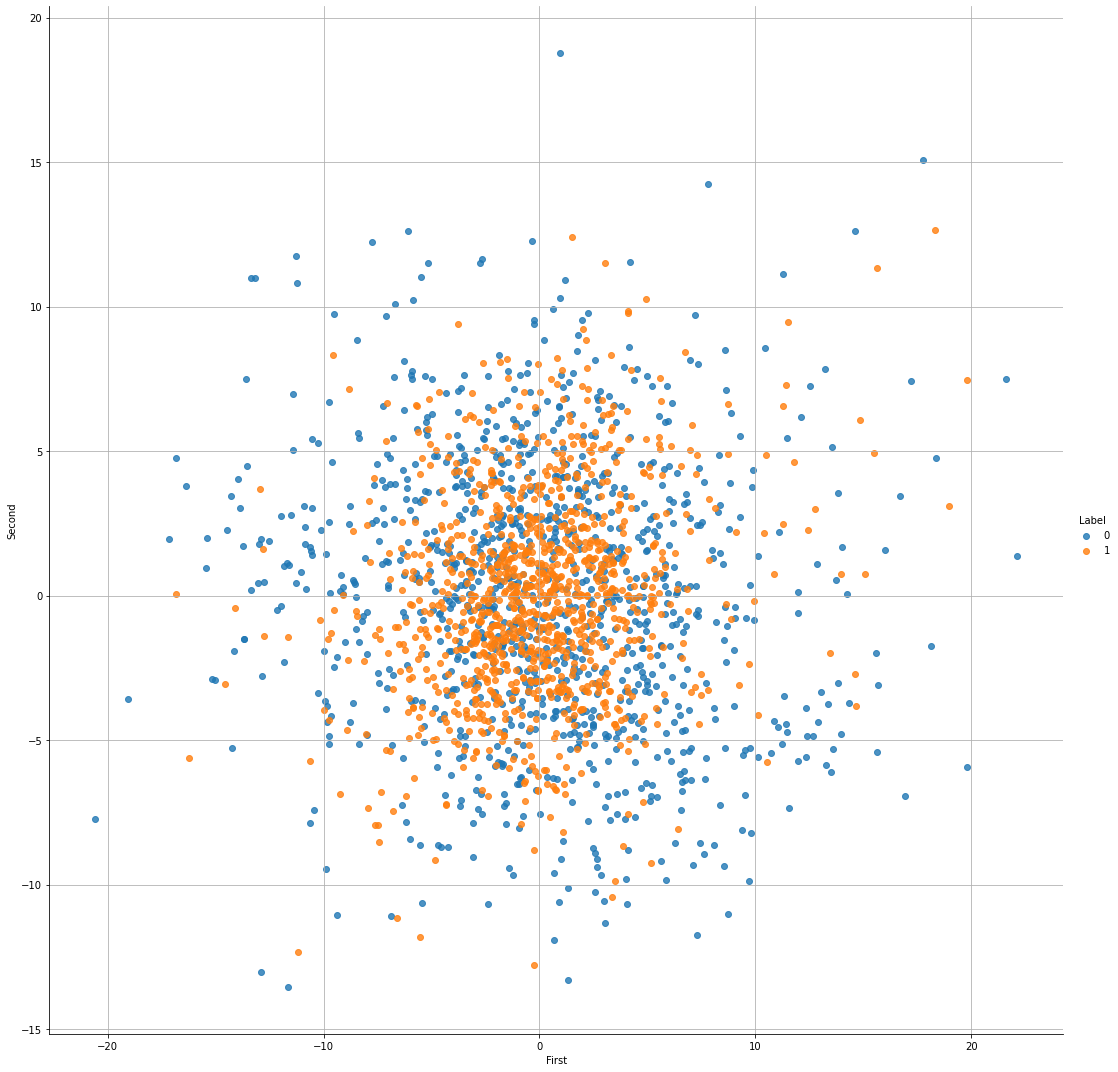

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

tempDF = pd.DataFrame(data=X_PCA.loc[:,0:1], index=X_PCA.index)
tempDF = pd.concat((tempDF,df_y_pd), axis=1, join="inner")
tempDF.columns = ["First", "Second", "Label"]
sns.lmplot(x="First", y="Second", hue="Label", data=tempDF, fit_reg=False, height=15)
plt.grid()

In [358]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(128,), random_state=1)
clf2 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2)], voting='soft', weights=[5, 4])

clf1.fit(X_PCA, y_.ravel())
yhat_1 = clf1.predict(X_PCA_test)
clf2.fit(X_PCA, y_.ravel())
yhat_2 = clf2.predict(X_PCA_test)
eclf.fit(X_PCA, y_.ravel())
yhat_4 = eclf.predict(X_PCA_test)

In [359]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_4))

0.538
0.703
0.566


#Reduce Features 

In [361]:
df_norm = fd_concat_distance
df_norm_test = fd_concat_distance_test
y_ = df_y

In [362]:
from sklearn.metrics.pairwise import euclidean_distances
df_norm_ = np.zeros((df_contact.shape[0], int(df_contact.shape[1]/4)))
c = 0
for row in df_contact:
  p = 0
  it = 0
  while p < (row.shape[0]-3)/2:  
    a = np.array((row[p], row[p+1])).reshape(1, -1)
    b = np.array((row[p+512], row[p+513])).reshape(1, -1)
    dst = euclidean_distances(a, b)
    df_norm_[c][it] = dst
    it = it + 1
    p = p + 2
    
  c = c + 1

df_norm_.shape

(2200, 256)

In [364]:
from sklearn.metrics.pairwise import euclidean_distances
df_norm_test_ = np.zeros((df_contact_test.shape[0], int(df_contact_test.shape[1]/4)))
c = 0
for row in df_contact_test:
  p = 0
  it = 0
  while p < (row.shape[0]-3)/2:   
    a = np.array((row[p], row[p+1])).reshape(1, -1)
    b = np.array((row[p+512], row[p+513])).reshape(1, -1)
    dst = euclidean_distances(a, b)
    df_norm_test_[c][it] = dst
    it = it + 1
    p = p + 2
    
  c = c + 1

df_norm_test_.shape

(1000, 256)

In [380]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(128,), random_state=1)
clf2 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2)], voting='soft', weights=[5, 5])

clf1.fit(df_norm_, y_.ravel())
yhat_1 = clf1.predict(df_norm_test_)
clf2.fit(df_norm_, y_.ravel())
yhat_2 = clf2.predict(df_norm_test_)
eclf.fit(df_norm_, y_.ravel())
yhat_4 = eclf.predict(df_norm_test_)

In [381]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_y_test, yhat_1))
print(accuracy_score(df_y_test, yhat_2))
print(accuracy_score(df_y_test, yhat_4))

0.704
0.838
0.768


------------------------

#Kamyar Nasiri